# Data Containers in Python Pandas

<div style="width:200px;margin-top:20px;"><img src="images/py_datasets.png" style="text-align:left"/></div>

<span style="font-size:24px;line-height:28px;">In age of big data volume, velocity, and variety:<br/>Store many similarly structured data sets in lists or dicts</span>

<hr style="border: 0.5px solid #E0E0E0;"/>

## Example Data
### NOAA: Arctic and Antarctica Sea Ice Index
<span style="font-size:20px"><a href="https://nsidc.org/data/g02135">https://nsidc.org/data/g02135</a></span>


In [5]:
%%html
<style>.prompt{width: 100px; min-width: 0; visibility: collapse}</style>

In [124]:
import itertools, calendar

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as sts

## Traditional Approach: Create 24 Data Frames


<span style="font-size:20px">North Hemisphere: Arctic</span>

In [7]:
north_ftp = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data"

n01 = pd.read_csv(f"{north_ftp}/N_01_extent_v3.0.csv")
n02 = pd.read_csv(f"{north_ftp}/N_02_extent_v3.0.csv")
n03 = pd.read_csv(f"{north_ftp}/N_03_extent_v3.0.csv")
# ...
n12 = pd.read_csv(f"{north_ftp}/N_12_extent_v3.0.csv")

<span style="font-size:20px">South Hemisphere: Antarctica</span>

In [8]:
south_ftp = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/monthly/data"

s01 = pd.read_csv(f"{south_ftp}/S_01_extent_v3.0.csv")
s02 = pd.read_csv(f"{south_ftp}/S_02_extent_v3.0.csv")
s03 = pd.read_csv(f"{south_ftp}/S_03_extent_v3.0.csv")
# ...
s12 = pd.read_csv(f"{south_ftp}/S_12_extent_v3.0.csv")

In [9]:
%who

calendar	 itertools	 n01	 n02	 n03	 n12	 north_ftp	 np	 pd	 
plt	 s01	 s02	 s03	 s12	 south_ftp	 


## Traditional Approach: Dynamic Assignment of Separate Objects

<ul style="font-size:20px;line-height:28px;">
    <li>Avoid manual adjustment of system objects: <code>globals()</code></li>
     <li>Breaks functional programming with data objects</li>    
     <li>Backdoor approach to affect environments</li>    
</ul>


In [ ]:
north_ftp = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data"
south_ftp = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/monthly/data"

for i in range(1,13):
  if i <= 9:
    globals()[f"N_0{i}"] = pd.read_csv(f"{north_ftp}/N_0{i}_extent_v3.0.csv")
    globals()[f"S_0{i}"] = pd.read_csv(f"{soutth_ftp}/N_0{i}_extent_v3.0.csv")
  else:
    globals()[f"N_{i}"] = pd.read_csv(f"{north_ftp}/N_{i}_extent_v3.0.csv")
    globals()[f"S_{i}"] = pd.read_csv(f"{soutth_ftp}/N_{i}_extent_v3.0.csv")

## Best Practice Approach: Single List/Dict of Many Data Frames

<ul style="font-size:20px;line-height:28px;">
    <li>Avoid flooding global environment with many separate objects</li>
    <li>Serializes data elements for organization and management</li>    
    <li>Eliminate repetitive, tedious code for readability and maintainability</li>    
</ul>


In [11]:
north_ftp = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data"
south_ftp = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/monthly/data"

prefs = [f"{i[0]}_{i[1]}" for i in itertools.product(["N","S"], [str(i).zfill(2) for i in range(1,13)])]

sea_ice_dfs = {p: 
                (pd.read_csv(f"{north_ftp}/{p}_extent_v3.0.csv") if p.startswith("N") else
                 pd.read_csv(f"{south_ftp}/{p}_extent_v3.0.csv")) for p in prefs     
              }

## Data frames within Lists/Dicts


<ul style="font-size:20px;line-height:28px;">
    <li>Indexable reference with no need to recall from environment: <code>globals()</code></li>
    <li>No loss of functionality or attributes/properties: <code>.head</code>, <code>.tail</code>, <code>.describe</code>, <code>.plot</code></li>    
    <li>Standardize operations on similarly-structured objects</li>    
</ul>

In [12]:
sea_ice_dfs['N_01'].head()

,year,mo,data-type,region,extent,area
0,1979,1,Goddard,N,15.41,12.41
1,1980,1,Goddard,N,14.86,11.94
2,1981,1,Goddard,N,14.91,11.91
3,1982,1,Goddard,N,15.18,12.19
4,1983,1,Goddard,N,14.94,12.01


In [13]:
sea_ice_dfs['S_01'].tail()

,year,mo,data-type,region,extent,area
37,2016,1,Goddard,S,4.69,3.03
38,2017,1,Goddard,S,3.78,2.56
39,2018,1,Goddard,S,4.21,2.69
40,2019,1,Goddard,S,3.87,2.66
41,2020,1,NRTSI-G,S,4.51,3.01


In [14]:
sea_ice_dfs['N_12'].shape

(42, 6)

In [15]:
sea_ice_dfs['S_12'].dtypes

year               int64
 mo                int64
    data-type     object
 region           object
 extent          float64
   area          float64
dtype: object

In [16]:
for k, df in sea_ice_dfs.items():
    print(k)
    display(df.describe(include='all'))

N_01


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,3,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,40,42,NaN,NaN
mean,1999.500000,1.0,NaN,NaN,-224.177381,-226.159048
std,12.267844,0.0,NaN,NaN,1545.075498,1544.762199
min,1979.000000,1.0,NaN,NaN,-9999.000000,-9999.000000
25%,1989.250000,1.0,NaN,NaN,13.670000,11.902500
50%,1999.500000,1.0,NaN,NaN,14.245000,12.160000
75%,2009.750000,1.0,NaN,NaN,14.727500,12.380000


N_02


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,2.0,NaN,NaN,15.118095,12.987381
std,12.267844,0.0,NaN,NaN,0.602026,0.417490
min,1979.000000,2.0,NaN,NaN,13.970000,12.260000
25%,1989.250000,2.0,NaN,NaN,14.557500,12.645000
50%,1999.500000,2.0,NaN,NaN,15.220000,12.970000
75%,2009.750000,2.0,NaN,NaN,15.575000,13.327500


N_03


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,3.0,NaN,NaN,15.272857,13.128333
std,12.267844,0.0,NaN,NaN,0.557491,0.381287
min,1979.000000,3.0,NaN,NaN,14.290000,12.520000
25%,1989.250000,3.0,NaN,NaN,14.830000,12.792500
50%,1999.500000,3.0,NaN,NaN,15.375000,13.120000
75%,2009.750000,3.0,NaN,NaN,15.622500,13.445000


N_04


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,4.0,NaN,NaN,14.544524,12.490000
std,12.267844,0.0,NaN,NaN,0.554204,0.352642
min,1979.000000,4.0,NaN,NaN,13.430000,11.830000
25%,1989.250000,4.0,NaN,NaN,14.095000,12.245000
50%,1999.500000,4.0,NaN,NaN,14.560000,12.440000
75%,2009.750000,4.0,NaN,NaN,15.010000,12.825000


N_05


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,5.0,NaN,NaN,13.128810,11.056905
std,12.267844,0.0,NaN,NaN,0.518568,0.326396
min,1979.000000,5.0,NaN,NaN,11.920000,10.250000
25%,1989.250000,5.0,NaN,NaN,12.802500,10.880000
50%,1999.500000,5.0,NaN,NaN,13.120000,11.030000
75%,2009.750000,5.0,NaN,NaN,13.547500,11.272500


N_06


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,6.0,NaN,NaN,11.559286,9.031905
std,12.267844,0.0,NaN,NaN,0.621408,0.466801
min,1979.000000,6.0,NaN,NaN,10.410000,8.160000
25%,1989.250000,6.0,NaN,NaN,11.062500,8.767500
50%,1999.500000,6.0,NaN,NaN,11.620000,9.070000
75%,2009.750000,6.0,NaN,NaN,12.102500,9.257500


N_07


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,7.0,NaN,NaN,9.131190,6.216667
std,12.267844,0.0,NaN,NaN,0.939655,0.611765
min,1979.000000,7.0,NaN,NaN,7.280000,5.060000
25%,1989.250000,7.0,NaN,NaN,8.297500,5.795000
50%,1999.500000,7.0,NaN,NaN,9.340000,6.295000
75%,2009.750000,7.0,NaN,NaN,9.967500,6.550000


N_08


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,8.0,NaN,NaN,6.818333,-233.721905
std,12.267844,0.0,NaN,NaN,1.036401,1543.566880
min,1979.000000,8.0,NaN,NaN,4.720000,-9999.000000
25%,1989.250000,8.0,NaN,NaN,5.935000,3.885000
50%,1999.500000,8.0,NaN,NaN,7.055000,4.635000
75%,2009.750000,8.0,NaN,NaN,7.737500,4.985000


N_09


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,9.0,NaN,NaN,6.017143,4.153810
std,12.267844,0.0,NaN,NaN,1.149838,0.791818
min,1979.000000,9.0,NaN,NaN,3.570000,2.410000
25%,1989.250000,9.0,NaN,NaN,4.955000,3.500000
50%,1999.500000,9.0,NaN,NaN,6.130000,4.295000
75%,2009.750000,9.0,NaN,NaN,7.040000,4.587500


N_10


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,10.0,NaN,NaN,7.913333,6.102619
std,12.267844,0.0,NaN,NaN,1.160809,0.947688
min,1979.000000,10.0,NaN,NaN,5.280000,4.080000
25%,1989.250000,10.0,NaN,NaN,7.042500,5.542500
50%,1999.500000,10.0,NaN,NaN,8.320000,6.215000
75%,2009.750000,10.0,NaN,NaN,8.820000,6.747500


N_11


,year,mo,data-type,region,extent,area
count,43.000000,43.0,43,43,43.000000,43.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,42,43,NaN,NaN
mean,1999.000000,11.0,NaN,NaN,10.473256,8.756744
std,12.556539,0.0,NaN,NaN,0.757363,0.609183
min,1978.000000,11.0,NaN,NaN,8.660000,7.010000
25%,1988.500000,11.0,NaN,NaN,9.835000,8.395000
50%,1999.000000,11.0,NaN,NaN,10.440000,8.770000
75%,2009.500000,11.0,NaN,NaN,11.100000,9.065000


N_12


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.00000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,N,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1998.500000,12.0,NaN,NaN,-225.67500,-227.529286
std,12.267844,0.0,NaN,NaN,1544.83878,1544.545630
min,1978.000000,12.0,NaN,NaN,-9999.00000,-9999.000000
25%,1988.250000,12.0,NaN,NaN,12.15750,10.522500
50%,1998.500000,12.0,NaN,NaN,12.64000,10.710000
75%,2008.750000,12.0,NaN,NaN,13.25750,10.987500


S_01


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,3,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,40,42,NaN,NaN
mean,1999.500000,1.0,NaN,NaN,-233.191905,-234.868810
std,12.267844,0.0,NaN,NaN,1543.650633,1543.385492
min,1979.000000,1.0,NaN,NaN,-9999.000000,-9999.000000
25%,1989.250000,1.0,NaN,NaN,4.510000,2.935000
50%,1999.500000,1.0,NaN,NaN,4.775000,3.195000
75%,2009.750000,1.0,NaN,NaN,5.415000,3.515000


S_02


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,2.0,NaN,NaN,3.058333,1.994048
std,12.267844,0.0,NaN,NaN,0.418365,0.294760
min,1979.000000,2.0,NaN,NaN,2.290000,1.370000
25%,1989.250000,2.0,NaN,NaN,2.840000,1.795000
50%,1999.500000,2.0,NaN,NaN,2.980000,1.905000
75%,2009.750000,2.0,NaN,NaN,3.197500,2.170000


S_03


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,3.0,NaN,NaN,4.010714,2.681190
std,12.267844,0.0,NaN,NaN,0.548169,0.426541
min,1979.000000,3.0,NaN,NaN,2.700000,1.830000
25%,1989.250000,3.0,NaN,NaN,3.677500,2.365000
50%,1999.500000,3.0,NaN,NaN,3.980000,2.650000
75%,2009.750000,3.0,NaN,NaN,4.402500,2.892500


S_04


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,4.0,NaN,NaN,6.835952,5.035000
std,12.267844,0.0,NaN,NaN,0.711992,0.641729
min,1979.000000,4.0,NaN,NaN,5.400000,3.680000
25%,1989.250000,4.0,NaN,NaN,6.397500,4.567500
50%,1999.500000,4.0,NaN,NaN,6.825000,5.080000
75%,2009.750000,4.0,NaN,NaN,7.257500,5.397500


S_05


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,5.0,NaN,NaN,10.152619,7.846667
std,12.267844,0.0,NaN,NaN,0.675242,0.614236
min,1979.000000,5.0,NaN,NaN,8.850000,6.440000
25%,1989.250000,5.0,NaN,NaN,9.660000,7.422500
50%,1999.500000,5.0,NaN,NaN,10.210000,7.910000
75%,2009.750000,5.0,NaN,NaN,10.597500,8.255000


S_06


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,6.0,NaN,NaN,13.367143,10.557619
std,12.267844,0.0,NaN,NaN,0.580493,0.572086
min,1979.000000,6.0,NaN,NaN,12.250000,9.580000
25%,1989.250000,6.0,NaN,NaN,13.082500,10.222500
50%,1999.500000,6.0,NaN,NaN,13.300000,10.525000
75%,2009.750000,6.0,NaN,NaN,13.747500,10.875000


S_07


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,7.0,NaN,NaN,15.990476,12.783810
std,12.267844,0.0,NaN,NaN,0.436248,0.446968
min,1979.000000,7.0,NaN,NaN,15.300000,12.090000
25%,1989.250000,7.0,NaN,NaN,15.712500,12.492500
50%,1999.500000,7.0,NaN,NaN,15.940000,12.640000
75%,2009.750000,7.0,NaN,NaN,16.275000,13.082500


S_08


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,8.0,NaN,NaN,17.765476,14.147381
std,12.267844,0.0,NaN,NaN,0.378213,0.357546
min,1979.000000,8.0,NaN,NaN,17.000000,13.460000
25%,1989.250000,8.0,NaN,NaN,17.572500,13.965000
50%,1999.500000,8.0,NaN,NaN,17.735000,14.045000
75%,2009.750000,8.0,NaN,NaN,17.912500,14.240000


S_09


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,9.0,NaN,NaN,18.530476,14.593571
std,12.267844,0.0,NaN,NaN,0.425435,0.423757
min,1979.000000,9.0,NaN,NaN,17.680000,13.860000
25%,1989.250000,9.0,NaN,NaN,18.192500,14.307500
50%,1999.500000,9.0,NaN,NaN,18.565000,14.555000
75%,2009.750000,9.0,NaN,NaN,18.800000,14.825000


S_10


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1999.500000,10.0,NaN,NaN,18.139048,14.076667
std,12.267844,0.0,NaN,NaN,0.398490,0.434695
min,1979.000000,10.0,NaN,NaN,17.180000,12.940000
25%,1989.250000,10.0,NaN,NaN,17.882500,13.805000
50%,1999.500000,10.0,NaN,NaN,18.110000,14.095000
75%,2009.750000,10.0,NaN,NaN,18.407500,14.400000


S_11


,year,mo,data-type,region,extent,area
count,43.000000,43.0,43,43,43.000000,43.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,42,43,NaN,NaN
mean,1999.000000,11.0,NaN,NaN,15.839535,11.617209
std,12.556539,0.0,NaN,NaN,0.486494,0.504948
min,1978.000000,11.0,NaN,NaN,14.220000,9.840000
25%,1988.500000,11.0,NaN,NaN,15.595000,11.335000
50%,1999.000000,11.0,NaN,NaN,15.900000,11.690000
75%,2009.500000,11.0,NaN,NaN,16.130000,11.890000


S_12


,year,mo,data-type,region,extent,area
count,42.000000,42.0,42,42,42.000000,42.000000
unique,NaN,NaN,2,1,NaN,NaN
top,NaN,NaN,Goddard,S,NaN,NaN
freq,NaN,NaN,41,42,NaN,NaN
mean,1998.500000,12.0,NaN,NaN,-227.973571,-231.349286
std,12.267844,0.0,NaN,NaN,1544.475532,1543.941865
min,1978.000000,12.0,NaN,NaN,-9999.000000,-9999.000000
25%,1988.250000,12.0,NaN,NaN,9.842500,6.482500
50%,1998.500000,12.0,NaN,NaN,10.320000,6.865000
75%,2008.750000,12.0,NaN,NaN,10.735000,7.170000


## Plotting

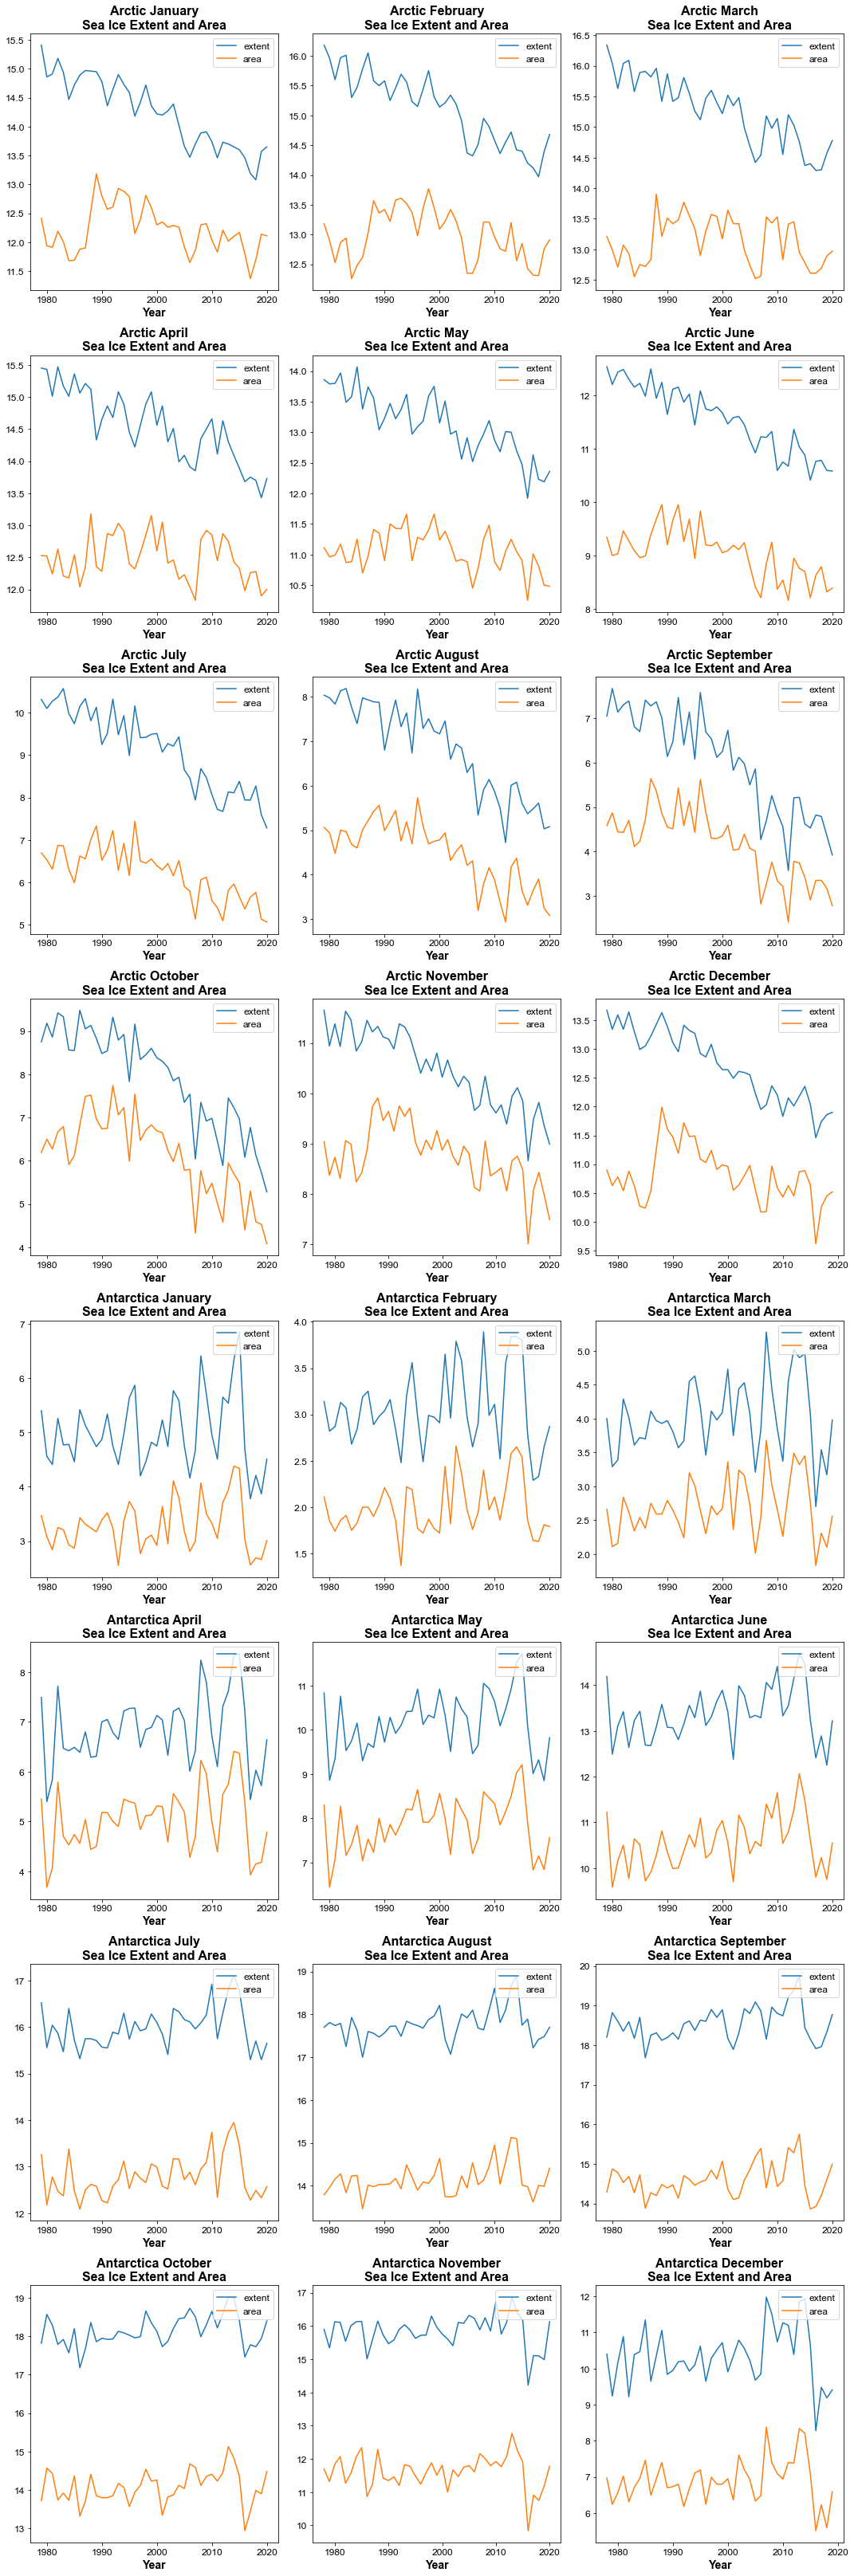

In [12]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 45))
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

for axs, (k,df) in zip(axes.ravel(), sea_ice_dfs.items()):
    df.columns = df.columns.str.strip()
    
    plot_title = (f"Arctic {calendar.month_name[df.loc[0,'mo']]}\nSea Ice Extent and Area" if k.startswith('N') 
                  else f"Antarctica {calendar.month_name[df.loc[0,'mo']]}\nSea Ice Extent and Area")
    
    (df.reindex(['year', 'extent', 'area'], axis='columns')
       .set_index('year')
       .query("(extent != -9999.00) & (area != -9999.00)")
       .plot(kind='line', ax=axs, title=plot_title, fontsize=12)
    )
    
    axs.set_title(axs.get_title(), {'fontsize': '16', 'fontweight' : 'bold'})
    axs.set_xlabel(axs.get_xlabel().title(), {'fontsize': '14', 'fontweight' : 'bold'})
    axs.legend(loc='upper right', prop={'size':12}) 

plt.tight_layout()
plt.show()
plt.clf()
plt.close()

## Master Compilation

In [17]:
sea_ice_df = pd.concat(sea_ice_dfs, ignore_index=True)

In [15]:
sea_ice_df.shape

(1010, 6)

In [20]:
sea_ice_df.columns = sea_ice_df.columns.str.strip()

In [21]:
sea_ice_df.dtypes

year           int64
mo             int64
data-type     object
region        object
extent       float64
area         float64
dtype: object

In [17]:
sea_ice_df.head()

,year,mo,data-type,region,extent,area
0,1979,1,Goddard,N,15.41,12.41
1,1980,1,Goddard,N,14.86,11.94
2,1981,1,Goddard,N,14.91,11.91
3,1982,1,Goddard,N,15.18,12.19
4,1983,1,Goddard,N,14.94,12.01


In [18]:
sea_ice_df.tail()

,year,mo,data-type,region,extent,area
1005,2015,12,Goddard,S,10.66,7.09
1006,2016,12,Goddard,S,8.28,5.51
1007,2017,12,Goddard,S,9.48,6.23
1008,2018,12,Goddard,S,9.19,5.59
1009,2019,12,Goddard,S,9.41,6.59


In [24]:
sea_ice_df['date'] = pd.to_datetime(sea_ice_df['year'].astype('str') + '-' + 
                                    sea_ice_df['mo'].astype('str') + '-01', format="%Y-%m-%d")

In [19]:
sea_ice_df.to_csv("data/NOAA_Sea_Ice_Index.csv", index=False)

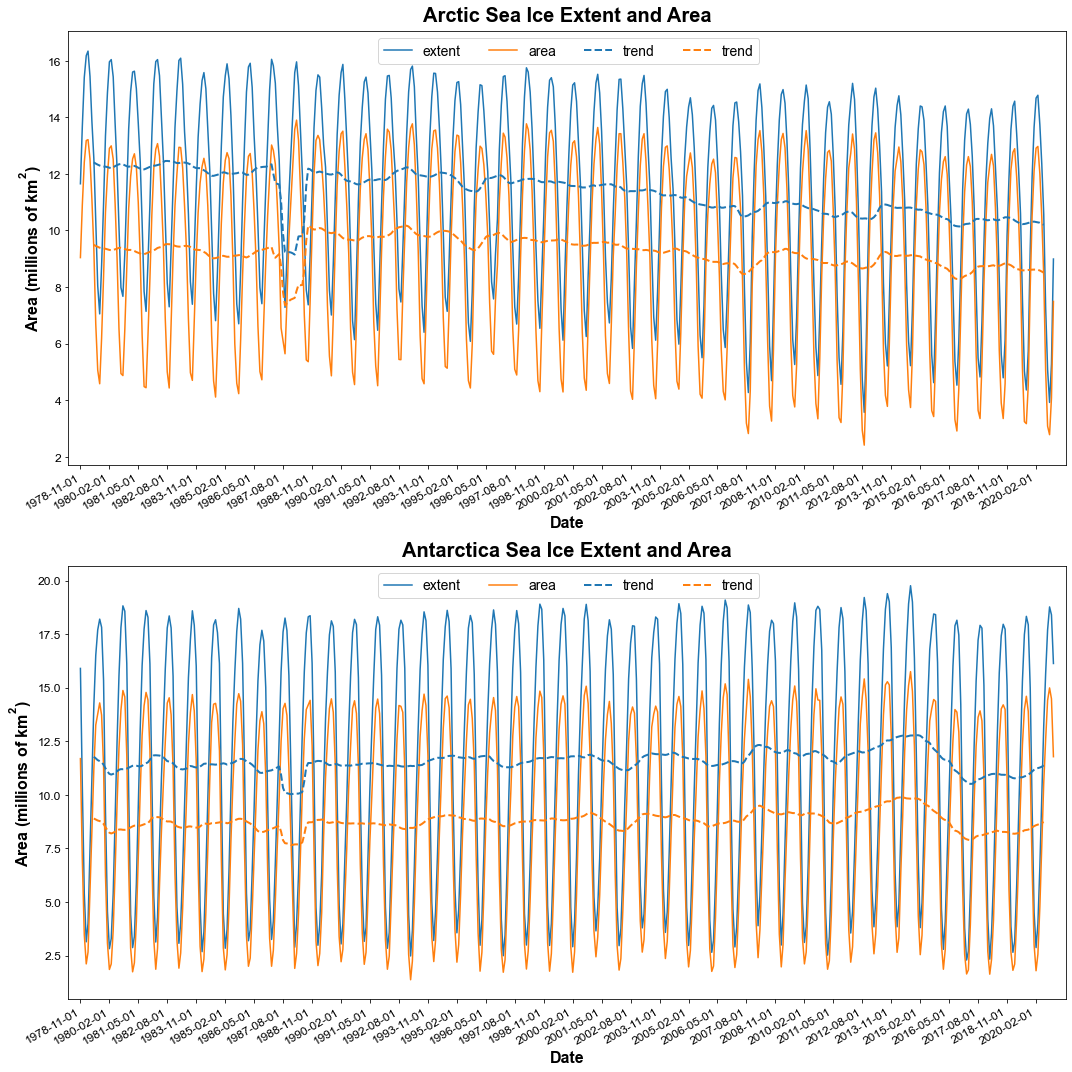

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

for axs, (k,df) in zip(axes.ravel(), sea_ice_df.groupby('region')):
    sub_df = (df.query("(extent != -9999.00) & (area != -9999.00)")
                .sort_values('date').set_index('date'))
    
    extent_trend = sts.seasonal_decompose(sub_df['extent'].resample('m').sum(), model='additive')
    area_trend = sts.seasonal_decompose(sub_df['area'].resample('m').sum(), model='additive')
    
    plot_title = ("Arctic Sea Ice Extent and Area" if k.strip() == 'N'
                  else "Antarctica Sea Ice Extent and Area")
    
    (df.reindex(['date', 'extent', 'area'], axis='columns')
       .set_index('date')
       .query("(extent != -9999.00) & (area != -9999.00)")
       .plot(kind='line', ax=axs, title=plot_title, fontsize=12, rot=0)
    )

    extent_trend.trend.plot(ax=axs, legend=False, color='#1f77b4', linestyle='dashed', linewidth=2)
    area_trend.trend.plot(ax=axs, legend=False, color='#ff7f0e', linestyle='dashed', linewidth=2)
    
    axs.set_title(axs.get_title(), {'fontsize': '20', 'fontweight' : 'bold'}, pad=10)
    axs.set_xlabel(axs.get_xlabel().title(), {'fontsize': '16', 'fontweight' : 'bold'})
    axs.set_ylabel('Area (millions of $\mathregular{km^2}$)', {'fontsize': '16', 'fontweight' : 'bold'})
    x_dates = df['date'].dt.strftime('%Y-%m-%d').sort_values().unique()[0::15]
    axs.set_xticks(x_dates)
    axs.xaxis.set_major_formatter(plt.FixedFormatter(x_dates))
    
    axs.legend(loc='upper right', prop={'size':14}, bbox_to_anchor=(0.7, 1.0), ncol=4)
    axs.margins(x=0.0125)
    
plt.tight_layout()
plt.show()
plt.clf()
plt.close()

<br/>
<br/>